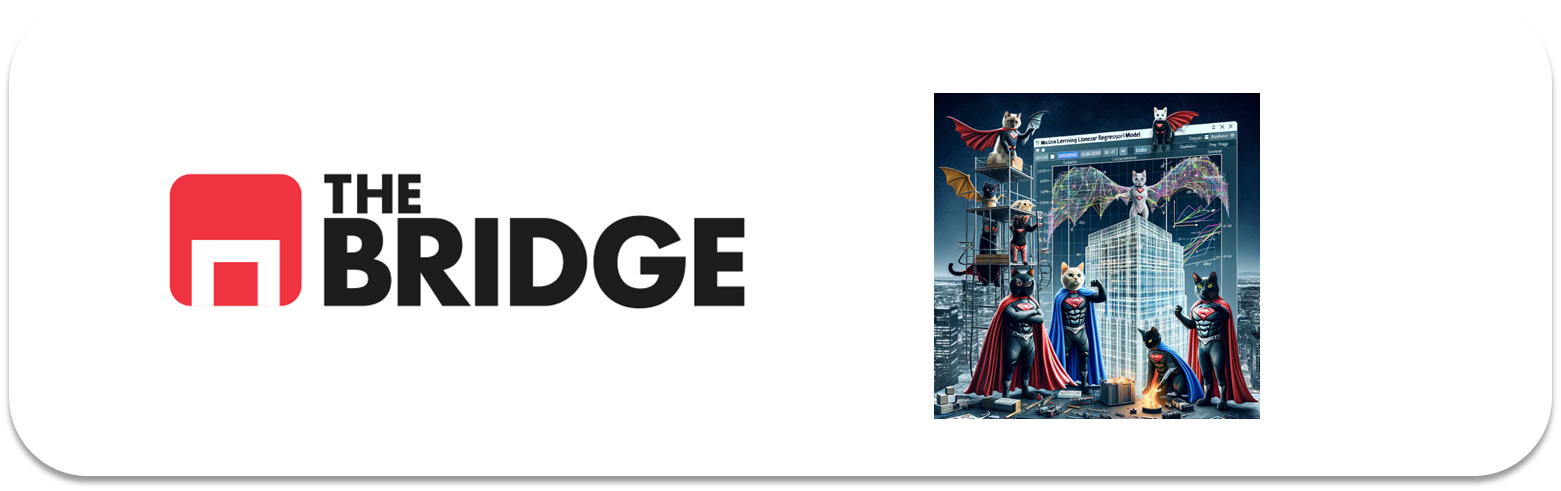

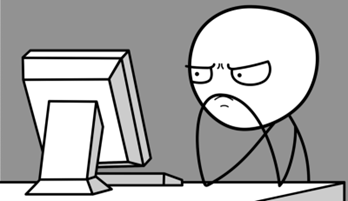

Para ejercitarte y afianzar lo aprendido sobre **Regresión Logística para clasificación binaria**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Inicio: Entendiendo el problema

En este caso el objetivo de los ejercicios es hacer un modelado de regresión logística sobre el dataset conocidos como "Adults" o "Census Income" que permita casificar a las personas en si ganan más de 50K dolalres o no, en función de una serie de características demográficas y de empleo. Sigue las instrucciones cuando sea necesario para poder continuar

El nombre de las columnas y sus valores se muestra a continuación (las columnas siguen el mismo orden que en el fichero, por si tuvieras que utilizar estos nombres)

age: edad, continuous.  

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.  

fnlwgt: continuous (a eliminar)  

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.  

education-num: continuous.  

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.  

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.  

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.  

sex: Female, Male.  

capital-gain: continuous.  

capital-loss: continuous.  

hours-per-week: continuous.  

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.  


### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc


### Ejercicio 1: Carga de datos y vistazo


Carga el conjunto de datos de TRAIN ("./data/adult.data") en un dataframe (tendrás que explorar el tipo de archivo y darle nombre a las columnas). Muestra la descripción de los datos y las primeras filas del conjunto de datos.

*Cargamos los datos, que es un poco tricky*

In [2]:
# Especifica las columnas basándote en el dataset original
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

# Dataset train
file_path = "./data/adult.data"
train = pd.read_csv(file_path, header=None, names=column_names, na_values="?", skipinitialspace=True) # Con el argumento na_values, se pueden sustituir valores "raros" por valores NaN
# train = pd.read_csv(file_path, header=None, names=column_names, skipinitialspace=True)

#Dataset test
file_path = "./data/adult.test"
test = pd.read_csv(file_path, header=None, names=column_names, na_values="?", skipinitialspace=True) # Con el argumento na_values, se pueden sustituir valores "raros" por valores NaN
# train = pd.read_csv(file_path, header=None, names=column_names, skipinitialspace=True)

In [3]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       15318 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      15315 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16007 non-null  object
 14  income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


### Ejercicio 2: Preparación y limpieza de Datos (I)

En una situación normal tendríamos que revisar el dataset para ver qué podemos limpiar (convertir tipos, cambiar valores raros, etc) y sólo no deberíamos imputar faltantes sobre el dataset global. Aquí te dirigiré los pasos:

1. Quita los espacios iniciales y finales de todos los valores string del dataset.
2. Comprueba que 'workclass', 'occupation', 'native_country' contienen un valor "raro", que indica los faltantes (este es un ejemplo de dataset con "missing" que no están marcados por np.NaN)
3. Deshazte de las columna "fnlwgt" que ni se entiende, ni se necesita y deshazte de las filas con esos faltantes (tenemos muchos datos y poco "tiempo").

In [7]:
# 1. Quitar los espacios iniciales y finales de todos los valores string del datasetç
train = train.applymap(lambda x: x.strip() if isinstance(x, str) else x)

test = test.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# applymap vs. .map (applymap para aplicar una función individualmente al conjunto de datos de un df vs. map para aplicar una función individualmente a un conjunto de datos de una columna de un df)
# lambda argumentos: expresión. Función lambda permite definir funciones pequeñas y sin asignar un nombre para ejecutar una operación simple

C:\Users\maria\AppData\Local\Temp\ipykernel_9240\3411708440.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train = train.applymap(lambda x: x.strip() if isinstance(x, str) else x)
C:\Users\maria\AppData\Local\Temp\ipykernel_9240\3411708440.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test = test.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [8]:
# 2. Comprobar los valores de las columnas 'workclass', 'occupation' y 'native_country'
# Con el argumento na_values="?" cuando se ha creado el df, se han transformado los valores raros '?' a NaN. Abajo el código para contabilizar los NaN en cada columna
train[['workclass','occupation','native-country']].isna().sum()

test[['workclass','occupation','native-country']].isna().sum()


workclass         963
occupation        966
native-country    274
dtype: int64

In [9]:
# Código apra comprobar valores únicos en las columnas específicas, en caso no se hubiera hecho la transformación a NaN con la importación de los datos
for column in ['workclass', 'occupation', 'native-country']:
    print(f"Valores únicos en '{column}':")
    print(train[column].unique())
    print("-" * 40)

Valores únicos en 'workclass':
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
----------------------------------------
Valores únicos en 'occupation':
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
----------------------------------------
Valores únicos en 'native-country':
['United-States' 'Cuba' 'Jamaica' 'India' nan 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Nethe

In [10]:
# 3. Eliminar la columna 'fnlwgt' y los NaN de las columnas 'workclass', 'occupation', 'native-country'
train.drop(columns='fnlwgt', inplace=True)
train.dropna(subset=['workclass', 'occupation', 'native-country'], inplace=True)

test.drop(columns='fnlwgt', inplace=True)
test.dropna(subset=['workclass', 'occupation', 'native-country'], inplace=True)

In [11]:
train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
test.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [13]:
train[['workclass','occupation','native-country']].isna().sum()

workclass         0
occupation        0
native-country    0
dtype: int64

In [14]:
test[['workclass','occupation','native-country']].isna().sum()

workclass         0
occupation        0
native-country    0
dtype: int64

### Ejercicio 3: Preparación y limpieza de Datos (II)

Escoge la ***variable target***, ¿qué particularidad tiene?¿qué debemos hacer con ella? Hazlo.

In [15]:
target = train['income']
target.value_counts(normalize=True)*100


income
<=50K    75.107751
>50K     24.892249
Name: proportion, dtype: float64

In [16]:
target_test = test['income']
target_test.value_counts(normalize=True)*100

income
<=50K.    75.431607
>50K.     24.568393
Name: proportion, dtype: float64

* Los valores de la variable target están expresados en modo string. Hay que convertirlos a valores numéricos 0 y 1
    * valores 1 (casos positivos) >50K
    * valores 0 (casos negativos ) <=50K 

In [17]:
target = target.apply(lambda x: 1 if x == ">50K" else 0)
target.value_counts(normalize=True)

income
0    0.751078
1    0.248922
Name: proportion, dtype: float64

In [18]:
target_test = target_test.apply(lambda x: 1 if x == ">50K." else 0)
target_test.value_counts(normalize=True)

income
0    0.754316
1    0.245684
Name: proportion, dtype: float64

In [19]:
# Elimiar variable target de train y test
train.drop(columns='income', inplace=True)
test.drop(columns='income', inplace=True)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   education       30162 non-null  object
 3   education-num   30162 non-null  int64 
 4   marital-status  30162 non-null  object
 5   occupation      30162 non-null  object
 6   relationship    30162 non-null  object
 7   race            30162 non-null  object
 8   sex             30162 non-null  object
 9   capital-gain    30162 non-null  int64 
 10  capital-loss    30162 non-null  int64 
 11  hours-per-week  30162 non-null  int64 
 12  native-country  30162 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


### Ejercicio 5: Preparar variables categóricas (I)

Prepara las variables categóricas, salvo "education" y "native_country" (o su equivalente si no la has llamado así al connvertirla en binaria), convirtiéndolas con un one-hot encoding (usa el pd.get_dummies). NOTA: Recuerda que este es el dataset de train, por eso lo atacamos directamente.

In [21]:
# Identificar las variables categóricas. Todas las variables categóricas son variables tipo 'object
cat_columns = train.select_dtypes(include=['object']).columns
cat_columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [22]:
# Excluir 'education' y 'native-country' de las columnas a codificar porque se les da un tratamiento diferente
columns_to_encode = [col for col in cat_columns if col not in ['education', 'native-country']]

# Aplicar one-hot encoding a las columnas seleccionadas
train = pd.get_dummies(train, columns=columns_to_encode, dtype= int)
test= pd.get_dummies(test, columns=columns_to_encode, dtype= int)

# mostrar el resultado
train.head()

,age,education,education-num,capital-gain,capital-loss,hours-per-week,native-country,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,39,Bachelors,13,2174,0,40,United-States,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,Bachelors,13,0,0,13,United-States,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,HS-grad,9,0,0,40,United-States,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,53,11th,7,0,0,40,United-States,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,28,Bachelors,13,0,0,40,Cuba,0,0,1,...,0,0,1,0,0,1,0,0,1,0


In [23]:
test.head()

,age,education,education-num,capital-gain,capital-loss,hours-per-week,native-country,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,25,11th,7,0,0,40,United-States,0,0,1,...,1,0,0,0,0,1,0,0,0,1
1,38,HS-grad,9,0,0,50,United-States,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,28,Assoc-acdm,12,0,0,40,United-States,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,44,Some-college,10,7688,0,40,United-States,0,0,1,...,0,0,0,0,0,1,0,0,0,1
5,34,10th,6,0,0,30,United-States,0,0,1,...,0,0,0,0,0,0,0,1,0,1


In [24]:
# Identificar las variables categóricas, tras la transformación. Todas las variables categóricas son variables tipo 'object
cat_columns = train.select_dtypes(include=['object']).columns
cat_columns

Index(['education', 'native-country'], dtype='object')

### Ejercicio 4: Preparar variables categóricas (II)

Muestra el reparto de valores de ***"native-country"***. Convierte la variable en una binara con 1 para ciudadanos norteamericanos y 0 para el resto.

NOTA: En otras ocasiones lo hubieramos tratados por continentes por ejemplo, pero de primeras la diferencia de distribución es tan alta que es mejor simplificar que no quedarse con todos los valores

In [25]:
train['native-country'].value_counts(normalize = True)*100

native-country
United-States                 91.187587
Mexico                         2.022412
Philippines                    0.623301
Germany                        0.424375
Puerto-Rico                    0.361382
Canada                         0.354751
India                          0.331543
El-Salvador                    0.331543
Cuba                           0.305020
England                        0.285127
Jamaica                        0.265234
South                          0.235396
China                          0.225449
Italy                          0.225449
Dominican-Republic             0.222134
Vietnam                        0.212188
Guatemala                      0.208872
Japan                          0.195610
Poland                         0.185664
Columbia                       0.185664
Iran                           0.139248
Taiwan                         0.139248
Haiti                          0.139248
Portugal                       0.112725
Nicaragua                

In [26]:
# Crear una nueva columna 'native-country_bin' con 1 para 'United-States' y 0 en caso contrario
train['native-country_bin'] = train['native-country'].apply(lambda x: 1 if x == "United-States" else 0)
test['native-country_bin'] = test['native-country'].apply(lambda x: 1 if x == "United-States" else 0)

C:\Users\maria\AppData\Local\Temp\ipykernel_9240\1708594732.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='native-country_bin', palette='pastel')


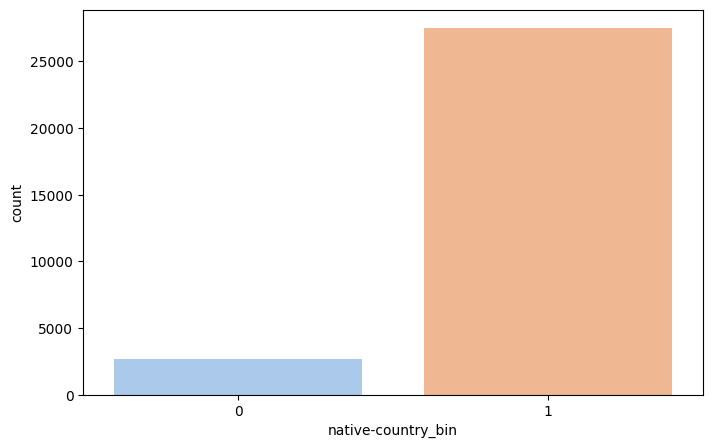

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train, x='native-country_bin', palette='pastel')
plt.show()

### Ejercicio 6: Preparar variables categóricas (III)

Codifica la variable ***"education"*** usando un ordinal encoding, no uses la codificación por defecto, elígela tú y razónala o bien demuestra pillería y que has revisado el dataset.

In [28]:
train['education'].value_counts()

education
HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: count, dtype: int64

In [29]:
categories = [["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th",
    "10th", "11th", "12th", "HS-grad", "Some-college", "Assoc-voc",
    "Assoc-acdm", "Bachelors", "Masters",
    "Doctorate", "Prof-school"]] #array de arrays para indicar el orden (de menor a mayor) de las categorías en el ordinal encoder. Se ordenan considerando las de mayor orden los niveles educaciones superiores

ordinal_encoder = OrdinalEncoder(categories=categories)

train['education_num'] = ordinal_encoder.fit_transform(train[["education"]])
test['education_num'] = ordinal_encoder.fit_transform(test[["education"]])

#mostrar el resultado del encoder
train[['education', 'education-num', 'education_num']].drop_duplicates().sort_values(by='education-num')


,education,education-num,education_num
224,Preschool,1,0.0
416,1st-4th,2,1.0
56,5th-6th,3,2.0
15,7th-8th,4,3.0
6,9th,5,4.0
219,10th,6,5.0
3,11th,7,6.0
415,12th,8,7.0
2,HS-grad,9,8.0
10,Some-college,10,9.0


### Ejercicio 6- bis: Preparar variables numéricas

NOTA: En un ejercicio completo deberíamos decidir si escalar las ***variables numéricas contínuas***, si quieres puedes hacero tú como extra y comparar con el modelo que vamos a completar en este conjunto de ejercicios.

In [30]:
# Identificar y mini EDA de las variables numéricas continuas
num_columns = ['age','education-num', 'education_num','capital-gain','capital-loss','hours-per-week']
train[num_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30162 non-null  int64  
 1   education-num   30162 non-null  int64  
 2   education_num   30162 non-null  float64
 3   capital-gain    30162 non-null  int64  
 4   capital-loss    30162 non-null  int64  
 5   hours-per-week  30162 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 1.6 MB


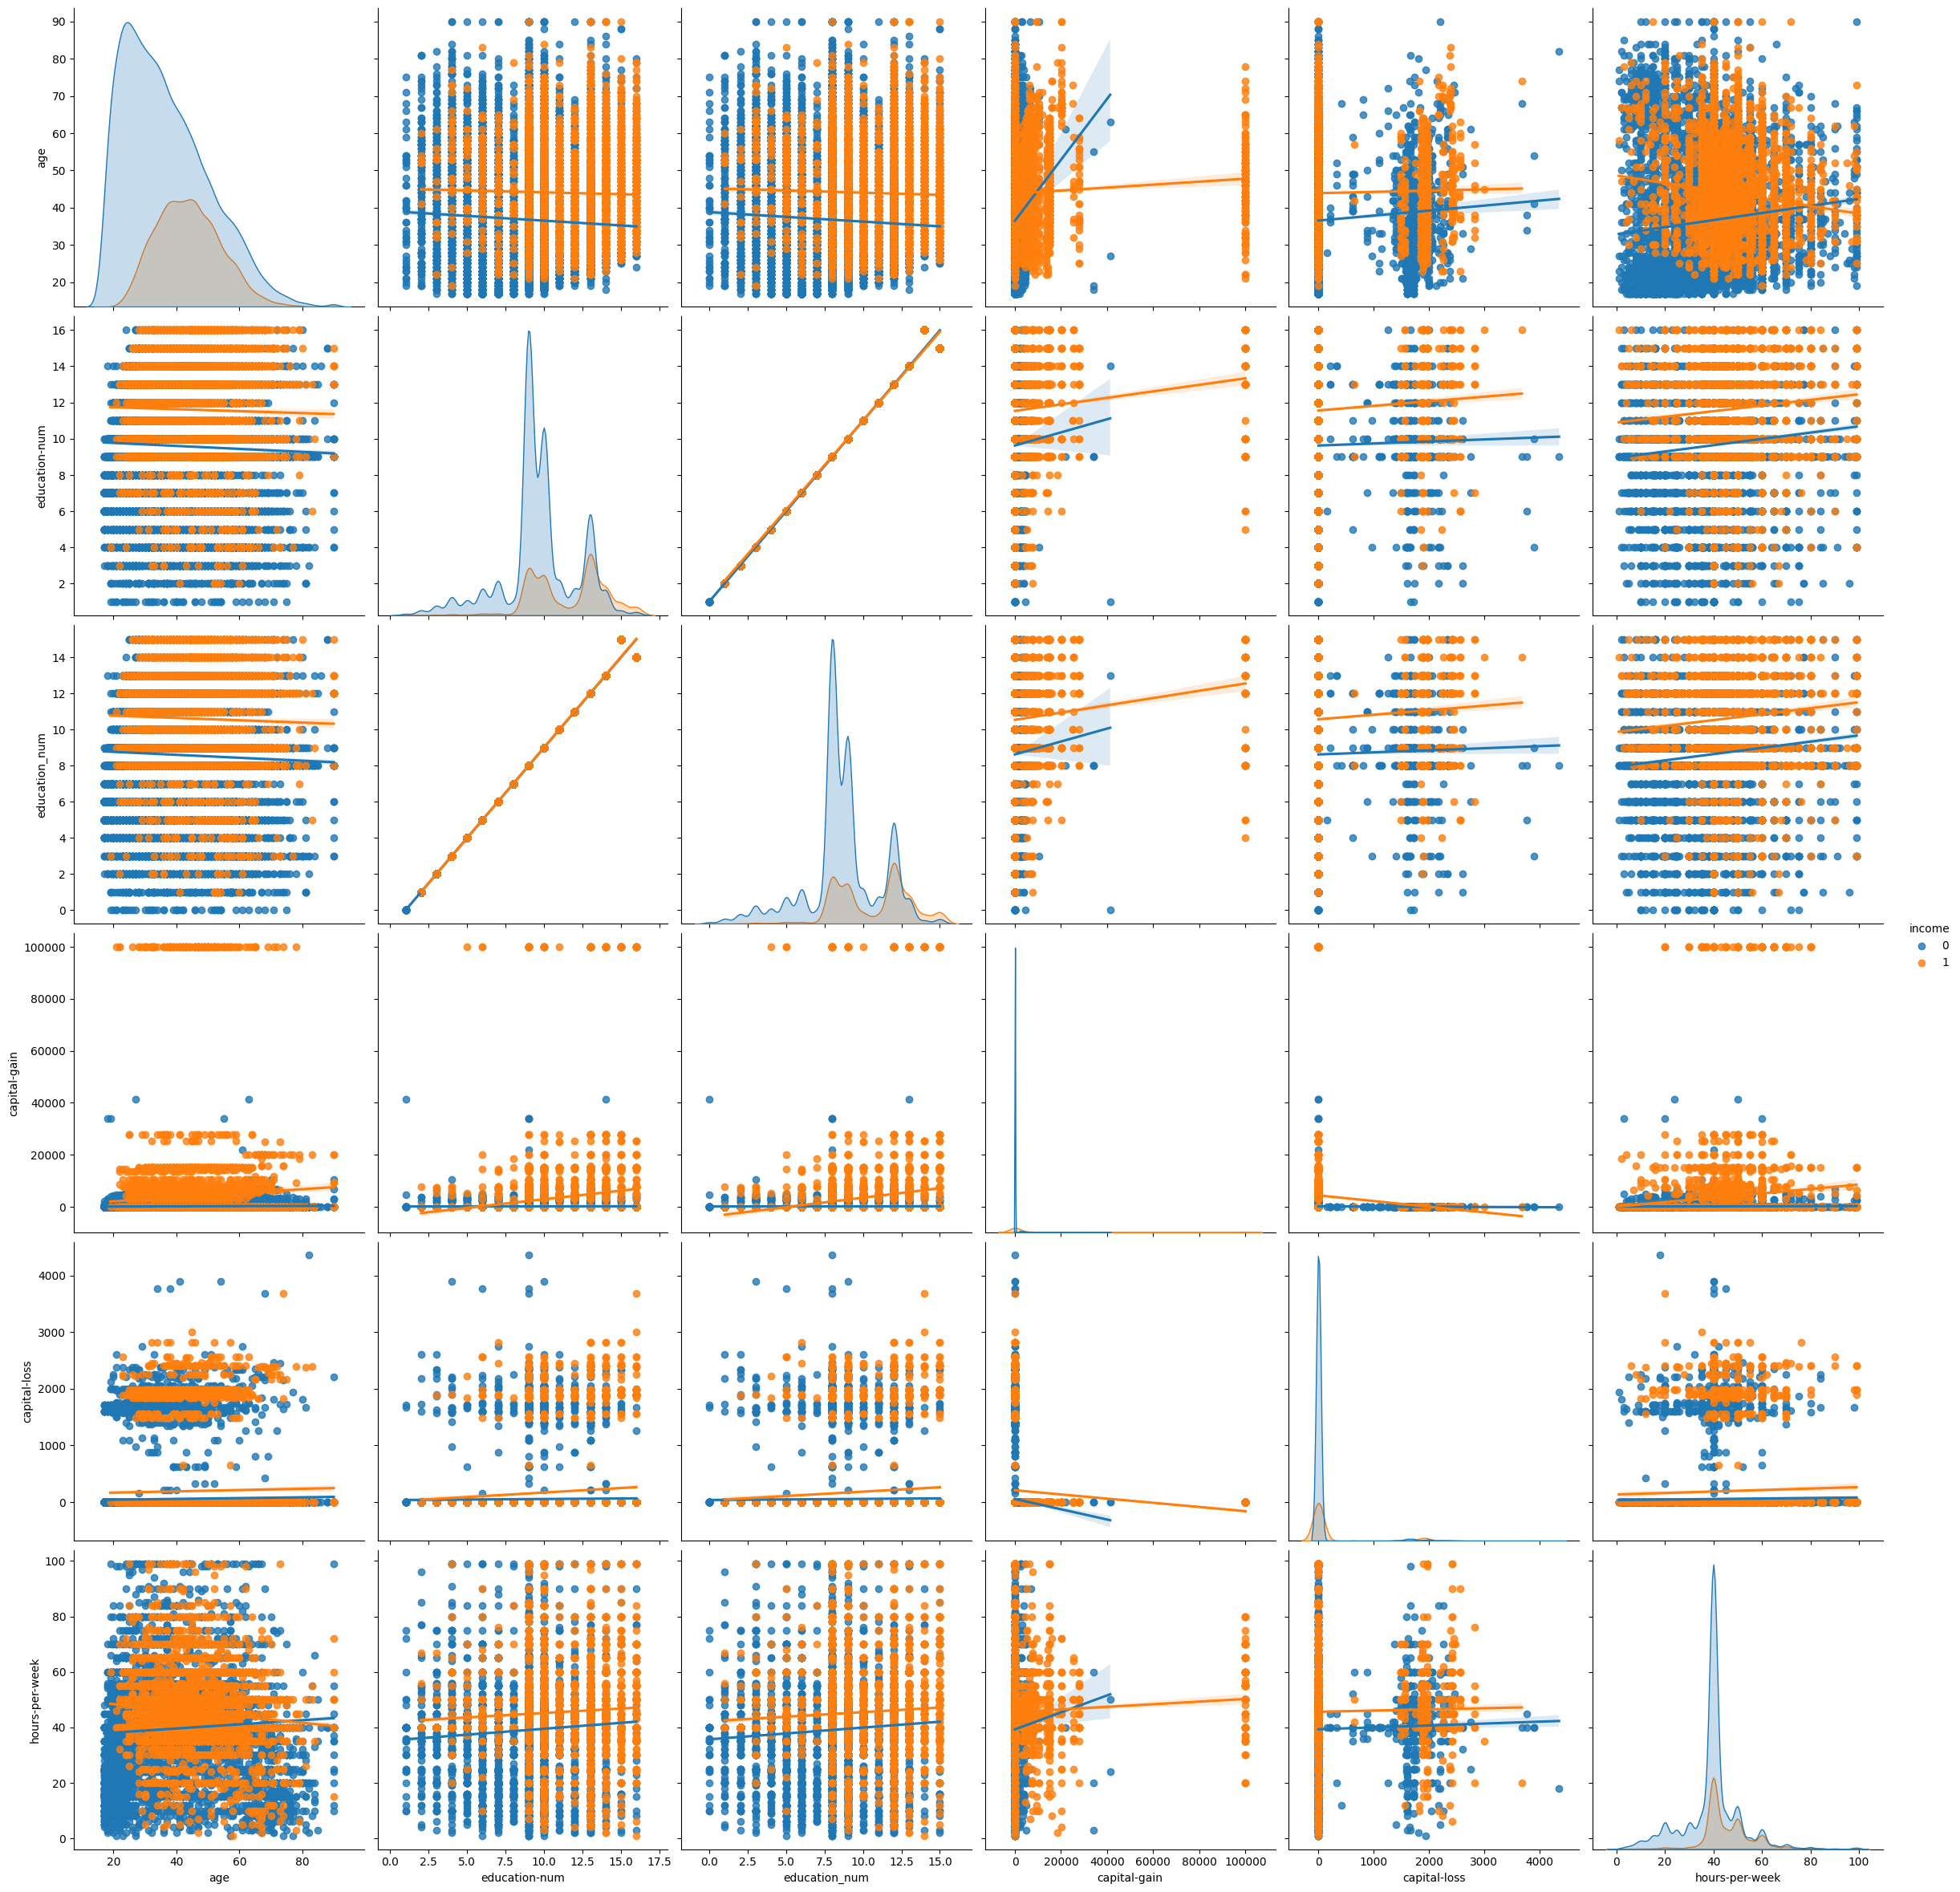

In [33]:
train_data = pd.concat([train,target],axis=1)
sns.pairplot(train_data,
            hue='income',
            height=4,
            vars=num_columns,
            kind='reg'); # "reg" de regresión lineal

In [367]:
# comprovar la cardinalidad de la variable education-num ---> numérica discreta
train['education-num'].nunique() / len(train['education-num']) * 100

0.053046880180359385

In [368]:
# comprovar la cardinalidad de la variable hours-per-week ---> numérica discreta
train['hours-per-week'].nunique() / len(train['hours-per-week']) * 100

0.31165042105961144

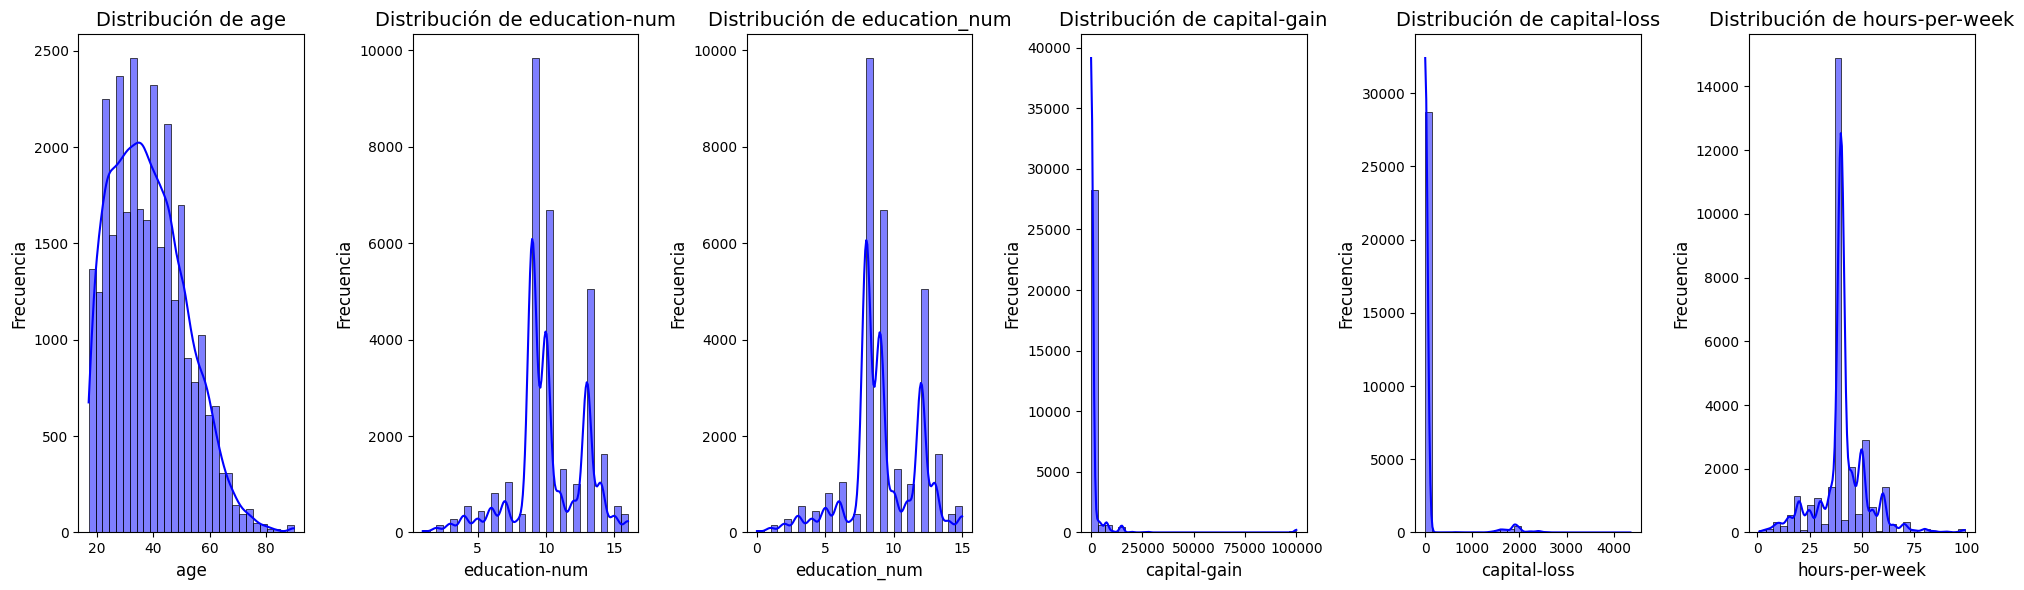

In [369]:
# Crear la figura y los subplots
fig, axes = plt.subplots(1, len(num_columns), figsize=(20, 6), sharey=False)

# Generar un histograma para cada variable continua
for ax, column in zip(axes, num_columns):
    sns.histplot(data=train, x=column, kde=True, bins=30, color='blue', ax=ax)
    ax.set_title(f'Distribución de {column}', fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Frecuencia', fontsize=12)

# Ajustar el diseño
plt.tight_layout()
plt.show()

In [370]:
train[num_columns].describe()

,age,education-num,education_num,capital-gain,capital-loss,hours-per-week
count,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,10.121312,9.126848,1092.007858,88.372489,40.931238
std,13.134665,2.549995,2.561641,7406.346497,404.298370,11.979984
min,17.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,8.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,9.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,15.000000,99999.000000,4356.000000,99.000000


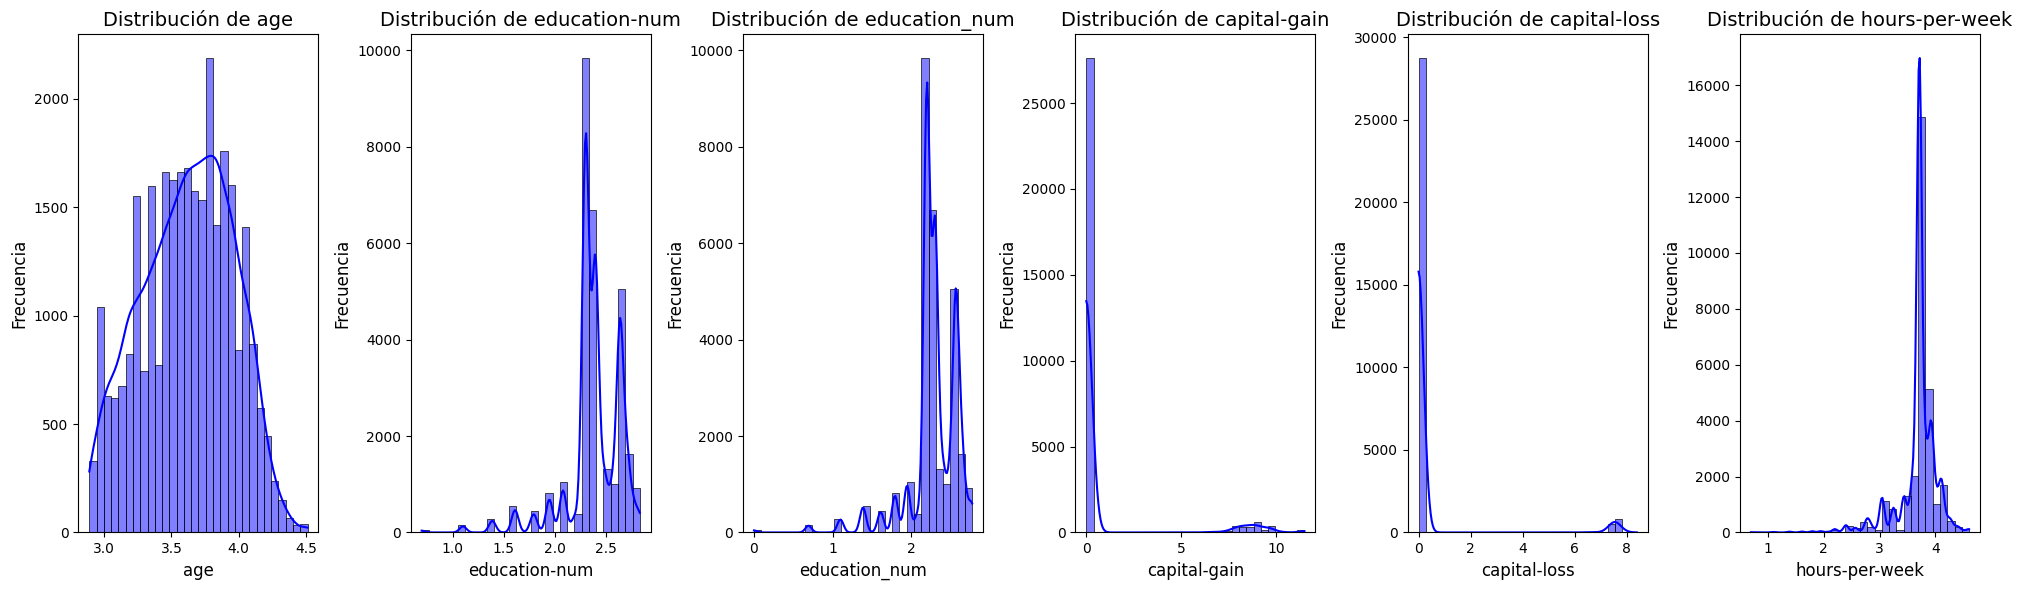

In [371]:
# Visualizar resultado de transformaciones loogarítmicas con figura
fig, axes = plt.subplots(1, len(num_columns), figsize=(20, 6), sharey=False)

# Generar un histograma para cada variable continua
for ax, column in zip(axes, num_columns):
    sns.histplot(data=(train[num_columns].apply(lambda x: np.log(x+1))), x=column, kde=True, bins=30, color='blue', ax=ax)
    ax.set_title(f'Distribución de {column}', fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Frecuencia', fontsize=12)

# Ajustar el diseño
plt.tight_layout()
plt.show()

In [372]:
# Analizar las distribuciones aplicando transformación logarítmica
(train[num_columns].apply(lambda x: np.log(x+1))).describe()

,age,education-num,education_num,capital-gain,capital-loss,hours-per-week
count,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,3.618462,2.377088,2.274512,0.743647,0.355226,3.684639
std,0.339236,0.269721,0.312380,2.470518,1.595010,0.355219
min,2.890372,0.693147,0.000000,0.000000,0.000000,0.693147
25%,3.367296,2.302585,2.197225,0.000000,0.000000,3.713572
50%,3.637586,2.397895,2.302585,0.000000,0.000000,3.713572
75%,3.871201,2.639057,2.564949,0.000000,0.000000,3.828641
max,4.510860,2.833213,2.772589,11.512925,8.379539,4.605170


In [373]:
# Aplicar transformación logarítmica a age,capital-gain y capital-loss
# Analizar las distribuciones aplicando transformación logarítmica
train[['age','capital-gain','capital-loss']] = (train[['age','capital-gain','capital-loss']].apply(lambda x: np.log(x+1)))
test[['age','capital-gain','capital-loss']] = (test[['age','capital-gain','capital-loss']].apply(lambda x: np.log(x+1)))

In [374]:
# Aplicar escalado a todas las numéricas, considerando únicamente education-num para no duplicar las variables
num_columns = ['age','education-num','capital-gain','capital-loss','hours-per-week']

std_scaler = StandardScaler() # seleccionamos el standar scaler por los valores extremos en la variable capital-loss
train[num_columns] = std_scaler.fit_transform(train[num_columns])
test[num_columns] = std_scaler.fit_transform(test[num_columns])

In [375]:
train[num_columns].describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,3.016200e+04,3.016200e+04,3.016200e+04,3.016200e+04,3.016200e+04
mean,-1.505798e-15,-3.053058e-16,7.538415e-18,-8.339372e-17,-2.833973e-16
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-2.146297e+00,-3.577051e+00,-3.010134e-01,-2.227147e-01,-3.333218e+00
25%,-7.403988e-01,-4.397382e-01,-3.010134e-01,-2.227147e-01,-7.773411e-02
50%,5.637540e-02,-4.757405e-02,-3.010134e-01,-2.227147e-01,-7.773411e-02
75%,7.450359e-01,1.128918e+00,-3.010134e-01,-2.227147e-01,3.396356e-01
max,2.630650e+00,2.305411e+00,4.359189e+00,5.030969e+00,4.847229e+00


### Ejercicio 7: Modelo (I)

Instancia el modelo de regresión logística, con el hiperparámetro "max_iter" a 10000.

In [376]:
log_reg = LogisticRegression(max_iter = 10000)

### Ejercicio 8: Entrenamiento

Entrena modelo para el dataset de train tal como lo hemos preparado, creando antes el dataset sólo de features (X_train) y la serie con los valores del target (y_train). NOTA: Deshazte de "education_num" si has codificado tú a mano "education".

In [377]:
# Crear train y test datasets
X_train = train.drop(columns=['education','native-country','education_num'])
X_test = test.drop(columns=['education','native-country','education_num'])
X_test

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_bin
0,-1.072767,-1.216563,-0.298953,-0.222827,-0.078889,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1
1,0.110574,-0.434898,-0.298953,-0.222827,0.750131,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,1
2,-0.754071,0.737599,-0.298953,-0.222827,-0.078889,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,1
3,0.528211,-0.044066,3.340474,-0.222827,-0.078889,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1
5,-0.205245,-1.607395,-0.298953,-0.222827,-0.907909,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,-0.289844,1.128431,-0.298953,-0.222827,-0.078889,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,1
16276,0.184464,1.128431,-0.298953,-0.222827,-0.410497,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,1
16278,0.110574,1.128431,-0.298953,-0.222827,0.750131,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,1
16279,0.528211,1.128431,3.200928,-0.222827,-0.078889,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1


In [378]:
y_train = target
y_test = target_test
y_test

0        0
1        0
2        1
3        1
5        0
        ..
16275    0
16276    0
16278    0
16279    0
16280    1
Name: income, Length: 15060, dtype: int64

### Ejercicio 9: Evaluación (I)

Previo a la evaluación necesitamos obtener y preparar el dataset de test. Carga el dataset a partir de "./data/adult.test". Luego aplícale las mismas operaciones que has realizado sobre el train. (NOTA; Puede que tengas que cambiar alguna cosa en la variable "income" para convertirla)

In [379]:
# Entranamiento del modelo:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

### Ejercicio 10: Evaluación (II)

Obten la predicción para X_train y para X_test.

In [380]:
from sklearn.metrics import accuracy_score

acc_train = round(accuracy_score(log_reg.predict(X_train), y_train), 3)
acc_test = round(accuracy_score(log_reg.predict(X_test), y_test), 3)

print("Accuracy train:", acc_train)
print("Accuracy test:", acc_test)

Accuracy train: 0.843
Accuracy test: 0.843


In [381]:
y_test.value_counts()

income
0    11360
1     3700
Name: count, dtype: int64

### Ejercicio 11: Evaluación (III)

Muestra la matriz de confusión para los resultados de train, así como el clasification_report de sklearn

              precision    recall  f1-score   support

           0       0.87      0.92      0.90     22654
           1       0.72      0.60      0.66      7508

    accuracy                           0.84     30162
   macro avg       0.80      0.76      0.78     30162
weighted avg       0.84      0.84      0.84     30162



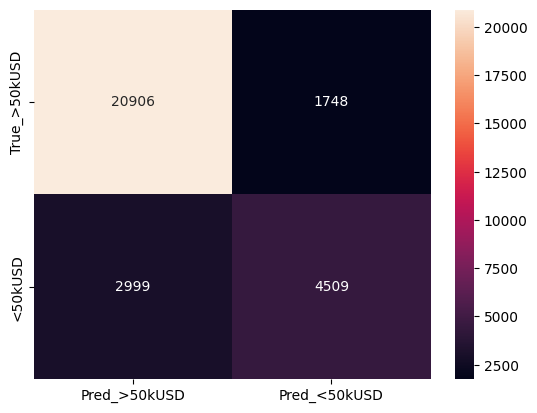

In [382]:
c_matrix = confusion_matrix(y_train, log_reg.predict(X_train))

c_matrix_df = pd.DataFrame(c_matrix, columns = ['Pred_>50kUSD', 'Pred_<50kUSD'],
                          index = ['True_>50kUSD', '<50kUSD'])

sns.heatmap(c_matrix_df, annot=True, fmt='g');

print(classification_report(y_train, log_reg.predict(X_train)))

### Ejercicio 12: Evaluación (IV)
Muestra la matriz de confusión y el classification report para los resultados del test. Comparála con los de train.

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     11360
           1       0.72      0.60      0.65      3700

    accuracy                           0.84     15060
   macro avg       0.80      0.76      0.77     15060
weighted avg       0.84      0.84      0.84     15060



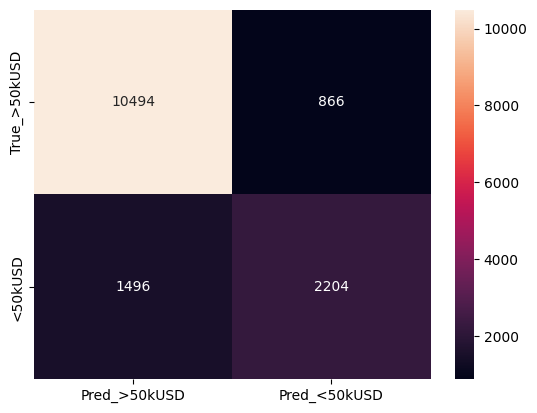

In [383]:
c_matrix = confusion_matrix(y_test, log_reg.predict(X_test))

c_matrix_df = pd.DataFrame(c_matrix, columns = ['Pred_>50kUSD', 'Pred_<50kUSD'],
                          index = ['True_>50kUSD', '<50kUSD'])

sns.heatmap(c_matrix_df, annot=True, fmt='g');

print(classification_report(y_test, log_reg.predict(X_test)))

### Extra: 

1. Muestra la curva ROC de test.

2. Muestra los coeficientes y su importancia.

AUROC: 0.90


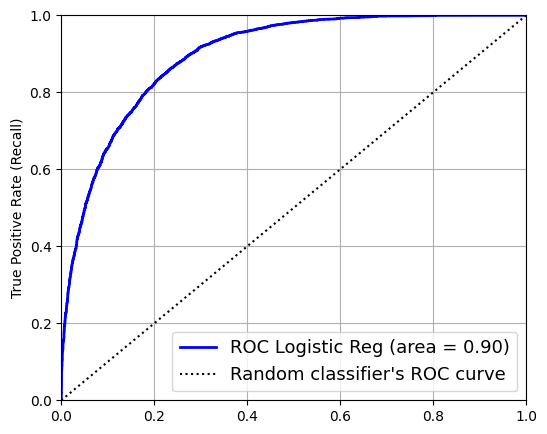

In [384]:
### Usando matplotlib
from sklearn.metrics import roc_curve, auc
scores = log_reg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, scores[:,1])
roc_auc = auc(fpr,tpr)
print("AUROC: %.2f" %(roc_auc))
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, color= "blue", label=f"ROC Logistic Reg (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

In [386]:
# Feature Importance
intercept = log_reg.intercept_
coefs = log_reg.coef_.ravel()

features = pd.DataFrame(coefs, X_train.columns, columns=['coefficient']).copy()
features['coefficient'] = np.abs(features['coefficient'])
features.sort_values('coefficient', ascending=False).head()

,coefficient
marital-status_Married-AF-spouse,1.595015
occupation_Priv-house-serv,1.432197
marital-status_Married-civ-spouse,1.118628
marital-status_Never-married,1.079498
relationship_Own-child,1.063348


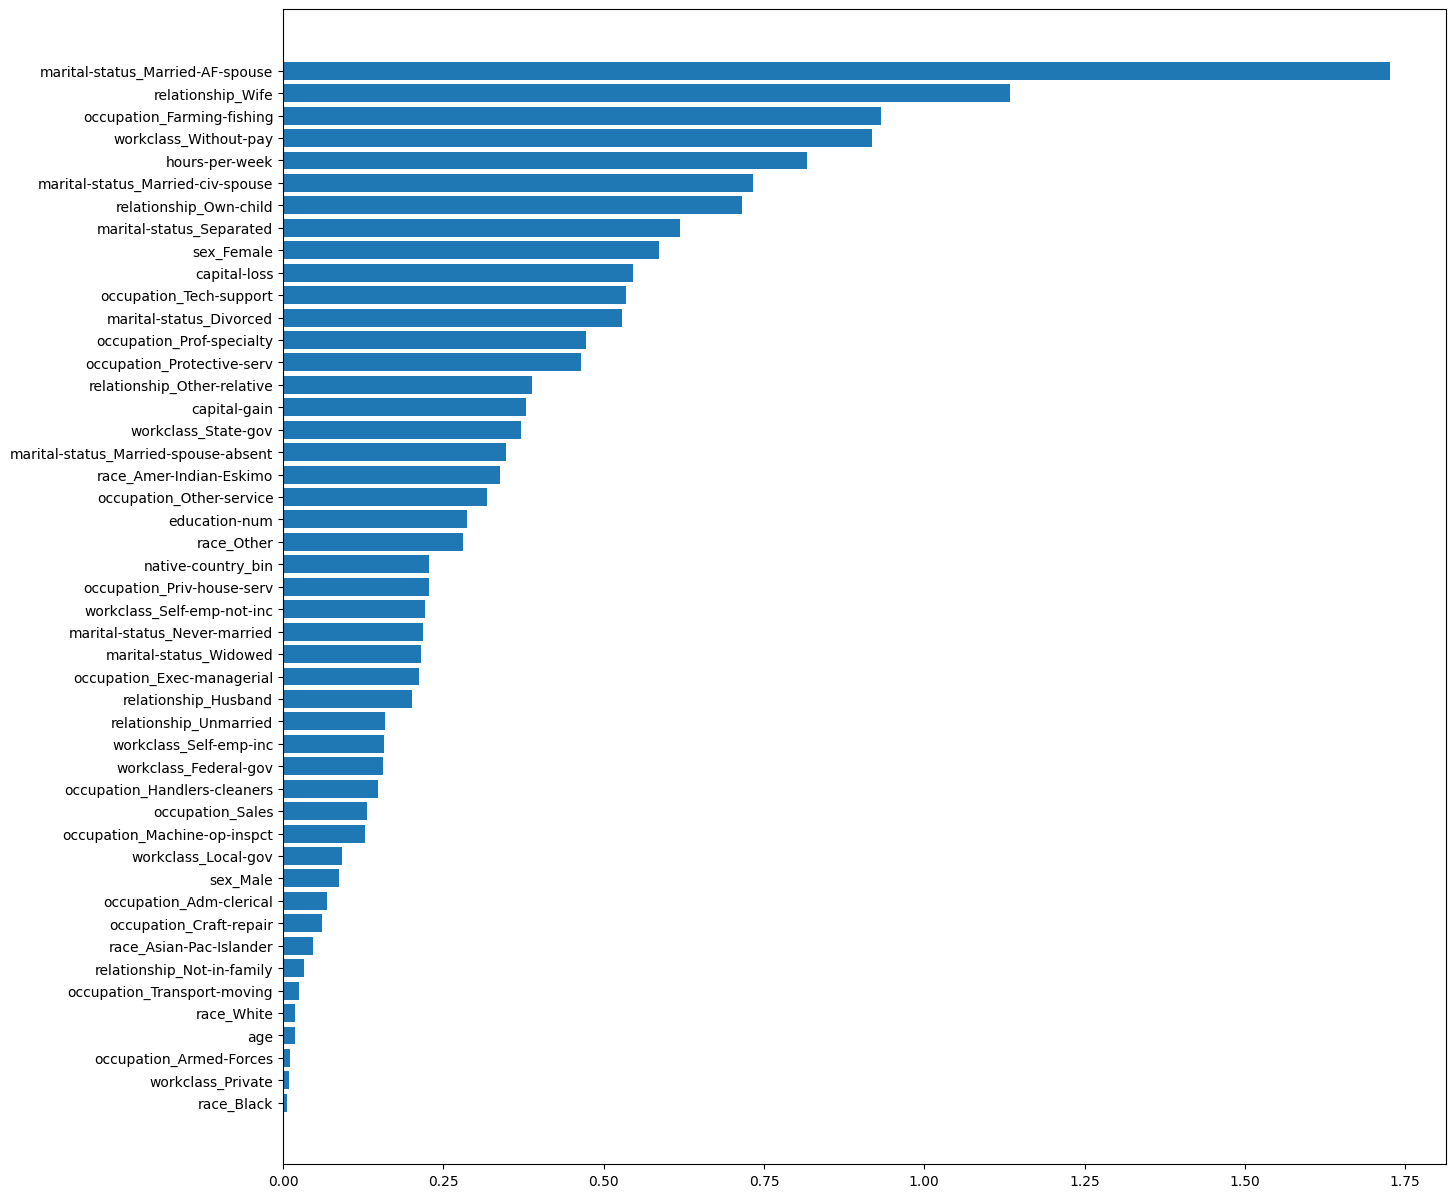

In [392]:
stdevs = []
for i in X_train.columns:
    stdev = train[i].std()
    stdevs.append(stdev)

features["stdev"] = np.array(stdevs).reshape(-1,1)
features["importance"] = features["coefficient"] * features["stdev"]
features['importance_standarized'] = features['importance'] / y_train.std()

features = features.sort_values('importance_standarized', ascending=True)

plt.figure(figsize=(15, 15))  
plt.barh(features.index, features.importance_standarized);